## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [56]:
df = pd.read_csv(r'C:\Users\Owner\Downloads\ab_data.csv') # load ab_dataset
df.head() # preview dataset

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [57]:
df.shape[0] # dataset row count

294478

c. The number of unique users in the dataset.

In [58]:
df.user_id.nunique() # number of unique users

290584

d. The proportion of users converted.

In [59]:
# proportion of users converted
df[df['converted']==True].shape[0] / df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [60]:
# count of new_page when treatment dont match
df.query('group == "treatment" and landing_page != "new_page"').count()[0]

1965

f. Do any of the rows have missing values?

In [61]:
# check for missing values
df.isnull().sum().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [62]:
# rows where treatment does not with match new_page
control_mismatch = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]
control_mismatch

3893

In [63]:
# rows where control does not with match old_page
treatment_mismatch = df[((df['group'] == 'control') == (df['landing_page'] == 'old_page')) == False].shape[0]
treatment_mismatch

3893

In [64]:
# check if mismatch for both groups occur within the same set of rows 
treatment_mismatch == treatment_mismatch

True

In [65]:
# filter out rows with mismatch where treatment does not match new_page. store in dataframe
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]
df2.shape[0]

290585

In [66]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [67]:
# number of unique user_id 
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [68]:
df2.loc[df2.user_id.duplicated()]['user_id']# duplicate user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [69]:
print('user_id 773192 appear twice in df2: \n{}'.format(df2.loc[df2['user_id'].duplicated(keep=False)]))

user_id 773192 appear twice in df2: 
      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [70]:
df2 = df2.drop_duplicates(subset=['user_id']) # remove one of the rows with duplicate user_id 

In [71]:
df2.user_id.duplicated().sum() # confirm row with duplicate user_id was removed

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [72]:
# proportion of users that converted
(df2['converted']==1).mean()
print('The probabilty of a individual converting is {}'.format((df2['converted']==1).mean()))

The probabilty of a individual converting is 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [73]:
# proportion of individuals in control group that converted
(df2.query('group == "control"')['converted']==1).mean()
print('Probabilty of individual in control group converting is {}'.\
      format((df2.query('group=="control"')['converted']==1).mean()))

Probabilty of individual in control group converting is 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [74]:
# proportion of individuals in treatment group that converted
(df2.query('group == "treatment"')['converted']==1).mean()
print('Probabilty of individual in treatment group converting is {}'.\
      format((df2.query('group=="treatment"')['converted']==1).mean()))

Probabilty of individual in treatment group converting is 0.11880806551510564


d. What is the probability that an individual received the new page?

In [75]:
# probability individual received new page
(df2.landing_page == "new_page").mean()

print('Probabilty individual received a new page is {}'.\
      format((df2.landing_page == "new_page").mean()))

Probabilty individual received a new page is 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The likelihood of individual in control group converting is 0.12, 12% and the likelihood of individual in treatment group converting is 0.1188, approximately 12%.
Given the above probabilities, there is not enough evidence to suggest that the new treatment page leads to more conversions since conversion rate in both groups are approximately the same. The new treatment page tend to show no effect on conversion.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: p_{new} - p_{old} ≤ 0 

H1: p_{new} - p_{old} > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [76]:
p_new = df2['converted'].mean() # conversion rate p_new
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [77]:
p_old = df2['converted'].mean() # conversion rate p_old
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [78]:
n_new = df2.query('group  == "treatment"').reset_index(drop=True).shape[0] # treatment group count
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [79]:
n_old = df2.query('group  == "control"').reset_index(drop=True).shape[0] # control group count
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [80]:
# simulate p_new transactions under null
new_page_converted = np.random.binomial(1,p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [81]:
# simulate p_old transactions under null 
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [82]:
# observed diference for simulated values
sim_diffs = new_page_converted.mean() - old_page_converted.mean()
sim_diffs

-0.0007660489847216567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [83]:
# Simulation via binomial distribution
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

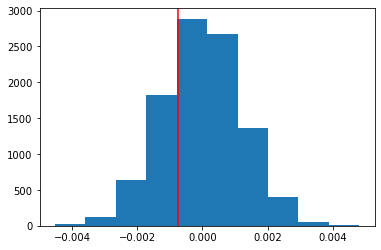

In [84]:
# plot histogram of the difference in means
plt.hist(p_diffs);
plt.axvline(x=sim_diffs, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [85]:
# actual difference from ab_data.csv
obs_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean()
obs_diff

-0.0015782389853555567

In [86]:
# p_value
(p_diffs > obs_diff).mean()

0.9028

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part j, we just computed the p-value, which is the probability of obtaining the observed statistic or one more extreme in favor of alternative hypothesis, given null hypothesis is true. In this case, p_value obtained is larger than the significance level of 0.05, suggesting our statistic came from the null and that the difference in conversion rate between the old_page and new_page is not significant. Thus, we fail to reject null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [87]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

convert_old = df2.query('landing_page == "old_page" and converted ==1').count()[0]
convert_new = df2.query('landing_page == "new_page" and converted ==1').count()[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0] 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [88]:
# compute z-score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [89]:
from scipy.stats import norm
print(norm.cdf(z_score)) # indicates significance of z-score 
print(norm.ppf(1-(0.05/2))) # shows critical value at 95% confidence 

0.09494168724097551
1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score is -1.31 which means it is 1.3 standard deviation below the mean. Also the z-score lies within critical value range of -1.96 and 1.96. The p_value is larger than the test significance level, as was the case in part j and k, 90.6%. Thus, the test fail to reject null hypothesis. This means that the test showed no significant difference in conversion rate between the old_page and new_page. The conclusion here agrees with the findings in part j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression approach should be adopted here to correctly predict one of the two possible outcome of categorical variable: conversion or no conversion.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [90]:
df2['intercept'] =1 # add intercept
df2[['new_page','old_page']] = pd.get_dummies(df2['landing_page']) # generate dummies for old and new pages
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']  # add ab_page column and generate dummies

df2.head() # preview the dataframe

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [91]:
# fit regression model to predict conversion
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit() # fit model

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [92]:
# model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:26:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p_value associated with ab_page is 0.190. The previous p_value was 0.905, both are higher than the significance level of 0.05, in which case we fail to reject null hypothesis

Part II test is a one-sided test having null hypothesis that the old page is better or same as new page while the alternative states that the new page is better than the old page. 

In comparison, part III is a two-sided test with null hypothesis stating that conversion is the same for old and new page while the alternative states that conversion is higher with new page.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

So far, using the different pages received by user to predict conversion rate yeild limited clarity as there is no statistically significant association of the terms with the response variable. It is safe to explore other terms and understand their association with the response variable in order to predict with some level of precision. 
On the other hand, adding additional terms may lead to multicolinearity which could result in inflation of the variance of the coefficients due correlation among the terms. This makes it difficult to accurately assess the effects of the correlated terms on the response variable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [93]:
# load country dataset 
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [94]:
# check unique country in dataset
countries_df['country'].nunique()

3

In [95]:
# view country name
countries_df.groupby('country').count()

,user_id
country,
CA,14499
UK,72466
US,203619


In [96]:
# merge country dataset 
df3 = df2.merge(countries_df, left_on='user_id', right_on='user_id',how='outer')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [97]:
# generate dummies for countries
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [49]:
df3['intercept'] = 1 # intercept for the model

# Logistic regression model 
logit_mod_1 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','UK','US']])
results_1 = logit_mod_1.fit() # fit logistic model 

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [50]:
# model summary
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:06:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The p_values of countries are well outside of the significance level which tells us that the association between country and conversion is not statistically significant, and the coefficients of the countries, i:e UK, US; are closer to zero implying that the effect of country on conversion is small. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
# interaction between page and country
df3['intercept'] = 1 # create intercept 
df3['CA_page'] = df3['ab_page'] * df3['CA'] # interraction CA and page
df3['US_page'] = df3['ab_page'] * df3['US'] # interraction US and page

In [52]:
# Logistic regression model 
logit_mod_2 = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','CA','US','CA_page','US_page']])
results_2 = logit_mod_2.fit() # fitting regression model 
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        13:06:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA_page       -0.0783      0.057     -1.378      0.168      -0.190       0.033
US_page       -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

In [53]:
# exponentiate regreswsion parameters
np.exp(results_2.params)

intercept    0.136392
ab_page      1.010893
CA           0.988285
US           1.005761
CA_page      0.924703
US_page      0.969090
dtype: float64

In [54]:
# finds reciprocal for parameters with negative coefficient
1/np.exp(results_2.params)

intercept    7.331806
ab_page      0.989224
CA           1.011854
US           0.994272
CA_page      1.081428
US_page      1.031896
dtype: float64

CONCLUSION:

The regression summary shows that the coefficients of the terms, except US, are negative, and all their p_values are higher than the significance level of the test. These suggest that conversion is less likely and that the terms are not statistically significant to precisely predict conversion.
Also observed is variance in the precision of the coefficients of the terms: The model estimates the US and the US page interaction coefficients with much higher precision than the CA and CA page interaction terms, as reflected by the standard error. This could be attributed to variance in sample size as US sample consist of 203619 users while CA sample has 14499 users. Though the baseline UK, consist of 72466 users.

Results indicate, with all else constant, that: 

with decrease unit, a CA user is 0.988285 times likely to convert given new page than a UK user; 

with unit increase, a US user is 1.005761 times likely to convert given new page than a UK user;

with decrease unit, conversion is 0.924703 likely to occur with CA_page interaction than UK_page interaction;

with decrease unit, conversion is 0.969090 likely to occur with US_page interaction than UK_page interaction;

Though US user show increase in likelihood of conversion than CA, with a p_value of 0.760, its term is statistically insignificant and may not lead to any significant importance in terms of application.
For the interaction between country and page, both US_page and CA_page, indicate insignificant interaction that could impact conversion substantially. The direction of likelihood of conversion occurring decreases with unit.

Overall, the p-values of all the terms are well outside of the significance level, suggesting we do not have strong evidence of association between country and conversion, neither exist a substantial interaction between country and page to impact conversion meaningfully. 
The negative coefficients of the terms and their closeness to zero suggest that conversion is less likely and the effect of conversion, where it occurs, is small. This small effect may not necessarily result in some practical importance.
Therfore, we can conclude that given the insignificant association between country and conversion, the insignificant interaction of country and page, and the resultant small effect of the terms, the test does not provide strong evidence against the null hypothesis. So, we fail to reject the null's position that there is no effect of country on conversion when user receive or interract with new page.

In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0